**Group #27's Project Proposal for DSCI 100 Sect.002**

Ella Woolcott, Nylah Grewal, Anoushka Gautam, Loveleen Chandi

# <span style="color: red;"> **TO DO!!**</span> 

3. Create model with best predictors and best k-value
4. Use test data with predictor model, display with table.


**Predicting Diagnosis of Heart Disease Based on Physical Indicator Variables**

**Introduction:**
Heart disease is a general term used to describe multiple medical conditions relating to the heart. Analyzing data relating to heart disease can have broad applications in public health and medicine, as heart disease is a leading cause of death. Symptoms of heart disease include chest pains, heart palpitations, and clogged blood vessels. Risk factors include high blood pressure and cholesterol. These variables are observed in the data set…upon wrangling the data, we may observe relationships between the patient’s symptoms and outcome/diagnosis.

The predictive question we are going to answer is:
What variables give the most reliable and accurate predictor outcome? 

The heart disease data set we have chosen to analyze comes from a machine learning repository and contains 4 databases from Cleveland, Long Beach, Hungary, and Switzerland. The dataset contains a lot of medical terminology, as shown in the table of 14 variables. The possible observations for each variable in the data set are categorical, integer, or numerical values.


| Atrribute Number | Varible | Observations Possible | Definition | 
|  :----: |    :----:   |  :----:  |  :----:  |
| 1     | age       | numerical value  | number in years |
| 2   | sex        | 1 = male; 0 = female      |self-explanatory      |
| 3   | chest_pain | Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic     |chest pain type |
| 4   | resting_blood_pressure        | in mm Hg on admission to the hospital     |resting blood pressure  |
| 5   | cholesterol        |  in mg/dl     |serum cholesterol       |
| 6   | fasting_blood_sugar        | TRUE = presence of diabetes (or blood sugar of >120mg/dl) and FALSE = absence of diabetes (or blood sugar of <120mg/dl)    |fasting blood sugar > 120 mg/dl      |
| 7   | rest_ecg        |Value 0: normal, Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria      |resting electrocardiographic results    |
| 8   | max_heart_rate       | numerical value      |maximum heart rate achieved   |
| 9   | exercise_induced_angina        | (1 = yes; 0 = no)      |exercise induced angina      |
| 10   | oldpeak        | numerical value     |ST depression induced by exercise relative to rest      |
| 11  | ST_slope        | Value 1: upsloping, Value 2: flat, Value 3: downsloping      |the slope of the peak exercise ST segment     |
| 12   | thalassemia        |3 = normal; 6 = fixed defect; 7 = reversible defect       |A blood disorder called thalassemia      |
| 13  | diagnosis        | Value 0: < 50% diameter, Value 1: > 50% diameter narrowing (in any major vessel: attributes 59 through 68 are vessels), meaning 0 = absence of heart disease while 1 = presence of heart disease      |diagnosis of heart disease (angiographic disease status)      |

**Methods and Results**

In [3]:
install.packages("leaps")
library(tidyverse)
library(repr)
library(tidymodels)
library(leaps)
options(repr.matrix.max.rows = 6)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [64]:
# Step 1: Demonstrate that the dataset can be read from the web into R
heart_data <- read.csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", header = FALSE)

In [65]:
#STEP 2
# Clean and wrangle your data into a tidy format
# Step 2: Clean and wrangle your data into a tidy format
colnames(heart_data) <- c("age", "sex", "chest_pain", "resting_blood_pressure", "cholesterol", "fasting_blood_sugar", "rest_ecg", "max_heart_rate", "exercise_induced_angina", "ST_depression", "ST_slope", "num_major_vessels", "thalassemia", "diagnosis")
heart_data_clean <- heart_data[heart_data$diagnosis != 0, c("age", "sex", "chest_pain", "resting_blood_pressure", "cholesterol", "fasting_blood_sugar", "rest_ecg", "max_heart_rate", "exercise_induced_angina", "ST_slope", "thalassemia", "diagnosis")]
heart_data_clean <- na.omit(heart_data_clean)
heart_data_clean



,age,sex,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,ST_slope,thalassemia,diagnosis
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
2,67,1,4,160,286,0,2,108,1,2,3.0,2
3,67,1,4,120,229,0,2,129,1,2,7.0,1
7,62,0,4,140,268,0,2,160,0,3,3.0,3
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
300,68,1,4,144,193,1,0,141,0,2,7.0,2
301,57,1,4,130,131,0,0,115,1,2,7.0,3
302,57,0,2,130,236,0,2,174,0,2,3.0,1


In [66]:
#STEP 3
#Convert necessary columns to factors
heart_data_clean$sex <- as.factor(heart_data_clean$sex)
heart_data_clean$chest_pain <- as.factor(heart_data_clean$chest_pain)
heart_data_clean$fasting_blood_sugar <- as.factor(heart_data_clean$fasting_blood_sugar)
heart_data_clean$rest_ecg <- factor(heart_data_clean$rest_ecg, levels = c("0", "1", "2"))
heart_data_clean$exercise_induced_angina <- as.factor(heart_data_clean$exercise_induced_angina)
heart_data_clean$ST_slope <- as.factor(heart_data_clean$ST_slope)
heart_data_clean$thalassemia <- factor(heart_data_clean$thalassemia, levels = c("3", "6", "7"))

heart_data_clean$diagnosis[heart_data_clean$diagnosis == 1] <- 0


heart_data_clean$diagnosis[heart_data_clean$diagnosis == 2] <- 1
heart_data_clean$diagnosis[heart_data_clean$diagnosis == 3] <- 1
heart_data_clean$diagnosis[heart_data_clean$diagnosis == 4] <- 1

heart_data_clean$diagnosis <- as.factor(heart_data_clean$diagnosis)

heart_data_clean

,age,sex,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,ST_slope,thalassemia,diagnosis
,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
2,67,1,4,160,286,0,2,108,1,2,NA,1
3,67,1,4,120,229,0,2,129,1,2,NA,0
7,62,0,4,140,268,0,2,160,0,3,NA,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
300,68,1,4,144,193,1,0,141,0,2,NA,1
301,57,1,4,130,131,0,0,115,1,2,NA,1
302,57,0,2,130,236,0,2,174,0,2,NA,0


In [67]:
set.seed(20)
#STEP 4
#Split into training and test 
heart_split <- initial_split(heart_data_clean, prop = 0.75, strata = diagnosis)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

**1. Predictor Selection**

In [71]:
set.seed(20)
#STEP 5
#Select relevant columns as predictor variables
heart_data_select <- heart_train |>
    mutate(diagnosis = as.numeric(diagnosis))|>
    select(-thalassemia)

In [72]:
#STEP 6
#Perform feature selection using a model
lm1 <- lm(heart_data_select,formula=diagnosis ~.)
summary(lm1)


Call:
lm(formula = diagnosis ~ ., data = heart_data_select)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9434 -0.3598  0.1222  0.3355  0.9645 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)   
(Intercept)               0.9303052  0.7655740   1.215  0.22751   
age                       0.0057984  0.0066723   0.869  0.38717   
sex1                      0.1016166  0.1338679   0.759  0.44981   
chest_pain2               0.0532158  0.2659078   0.200  0.84184   
chest_pain3              -0.0980269  0.2410029  -0.407  0.68517   
chest_pain4               0.2374643  0.2162810   1.098  0.27519   
resting_blood_pressure   -0.0006231  0.0028148  -0.221  0.82533   
cholesterol               0.0008873  0.0009973   0.890  0.37603   
fasting_blood_sugar1      0.3399369  0.1258225   2.702  0.00826 **
rest_ecg1                 0.4391716  0.3623036   1.212  0.22866   
rest_ecg2                -0.0143741  0.0987661  -0.146  0.88462   
max_heart_rate           -

In [73]:
#STEP 7
#Obtain feature importance
Best_Subset <-
    regsubsets(diagnosis~.,
               data =heart_data_select,
               nbest = 1,      # 1 best model for each number of predictors
               nvmax = NULL,    # NULL for no limit on number of variables
               force.in = NULL, force.out = NULL,
               method = "exhaustive")

summary_best_subset <- summary(Best_Subset)
as.data.frame(summary_best_subset$outmat)

,age,sex1,chest_pain2,chest_pain3,chest_pain4,resting_blood_pressure,cholesterol,fasting_blood_sugar1,rest_ecg1,rest_ecg2,max_heart_rate,exercise_induced_angina1,ST_slope2,ST_slope3
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1 ( 1 ),,,,,,,,*,,,,,,
2 ( 1 ),,,,,*,,,*,,,,,,
3 ( 1 ),,,,,*,,,*,,,,,*,
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
12 ( 1 ),*,*,,*,*,*,*,*,*,,*,*,*,*
13 ( 1 ),*,*,*,*,*,*,*,*,*,,*,*,*,*
14 ( 1 ),*,*,*,*,*,*,*,*,*,*,*,*,*,*


In [74]:
#STEP 8 
#Find best number of predictors 
which.max(summary_best_subset$adjr2)

[1] 6

In [77]:
#STEP9 
#Select best 6 predictors 
print(summary_best_subset$which[7,])

             (Intercept)                      age                     sex1 
                    TRUE                     TRUE                    FALSE 
             chest_pain2              chest_pain3              chest_pain4 
                   FALSE                    FALSE                     TRUE 
  resting_blood_pressure              cholesterol     fasting_blood_sugar1 
                   FALSE                    FALSE                     TRUE 
               rest_ecg1                rest_ecg2           max_heart_rate 
                    TRUE                    FALSE                     TRUE 
exercise_induced_angina1                ST_slope2                ST_slope3 
                   FALSE                     TRUE                     TRUE 


The 6 best predictors with the most important coefficents are: Rest ECG, ST Slope, Chest Pain, Fasting Blood Sugar, Age, Max_Heart_Rate. 

The model we used to get feature importance looked at each class within the predictors not the predictors as a whole. So when selecting our predictors we expanded the list until we had 6 seperate catergories named as we are filtering our data for the entire predictor subset, not specific predictor classes. 

In [78]:
#STATS 
#maximum values of discrete and continious variables (age, resting_blood_pressure, cholesterol, max_heart_rate, ST_depression)
heart_max <- heart_train |>
  summarize(across(-sex, ~ if(is.numeric(.)) max(.) else first(.))) |>
  select(age, resting_blood_pressure, cholesterol, max_heart_rate, ST_slope)

#minimum values of discrete and continious variables (age, resting_blood_pressure, cholesterol, max_heart_rate, ST_depression)                  
heart_min <- heart_train |>
  summarize(across(-sex, ~ if(is.numeric(.)) min(.) else first(.))) |>
  select(age, resting_blood_pressure, cholesterol, max_heart_rate, ST_slope)



In [79]:
#combining minimum and maximum rows for easier comparison. Upper row is minimum values and lower row is maximum values
heart_minmax <- bind_rows(heart_min, heart_max)
heart_minmax

age,resting_blood_pressure,cholesterol,max_heart_rate,ST_slope
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
35,100,131,71,2
70,200,409,195,2


In [80]:
#averages and standard deviations of continous or discrete variables (age, resting_blood_pressure, cholesterol, max_heart_rate, ST_Slope)

heart_train$ST_slope <- as.numeric(as.character(heart_train$ST_slope))

heart_mean <- heart_train |>
  select(age, resting_blood_pressure, cholesterol, max_heart_rate, ST_slope) |>
  summarize(across(age:ST_slope, mean))
heart_mean

heart_sd <- heart_train |>
  select(age, resting_blood_pressure, cholesterol, max_heart_rate, ST_slope) |>
  summarize(across(age:ST_slope, sd))
heart_sd



age,resting_blood_pressure,cholesterol,max_heart_rate,ST_slope
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
56.91346,135.7404,255.2981,137.7885,1.855769


age,resting_blood_pressure,cholesterol,max_heart_rate,ST_slope
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.444436,18.63236,49.52941,23.35154,0.5471598


In [81]:
# Convert ST_slope to numeric in heart_min and heart_max
heart_min$ST_slope <- as.numeric(as.character(heart_min$ST_slope))
heart_max$ST_slope <- as.numeric(as.character(heart_max$ST_slope))

# Combine all the summary statistics into one table
heart_summary <- bind_rows(
  heart_min,
  heart_max,
  heart_mean,
  heart_sd
)

heart_summary


age,resting_blood_pressure,cholesterol,max_heart_rate,ST_slope
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
35.000000,100.00000,131.00000,71.00000,2.0000000
70.000000,200.00000,409.00000,195.00000,2.0000000
56.913462,135.74038,255.29808,137.78846,1.8557692
7.444436,18.63236,49.52941,23.35154,0.5471598


Explaination of the Table Contents

age: The minimum age observed in the training data is 35 years, and the maximum age is 77 years. The average age of the patients in the training data is approximately 56.8 years, with a standard deviation of around 7.7.

resting_blood_pressure: The minimum resting blood pressure recorded in the training data is 100 mm Hg, and the maximum resting blood pressure is 200 mm Hg. The average resting blood pressure is approximately 135.0 mm Hg, with a standard deviation of around 19.4.

cholesterol: The minimum cholesterol level observed in the training data is 131 mg/dL, and the maximum cholesterol level is 409 mg/dL. The average cholesterol level is approximately 256.6 mg/dL, with a standard deviation of around 48.6.

max_heart_rate: The minimum maximum heart rate observed in the training data is 71 beats per minute, and the maximum maximum heart rate is 195 beats per minute. The average maximum heart rate is approximately 141.7 beats per minute, with a standard deviation of around 21.1.

ST_slope: The ST slope is a categorical variable represented by numbers. The minimum and maximum values of the ST slope observed in the training data are both 2. The average ST slope is approximately 1.77, with a standard deviation of around 0.58.

**Comparisons and Visualizations Within the Data Set**

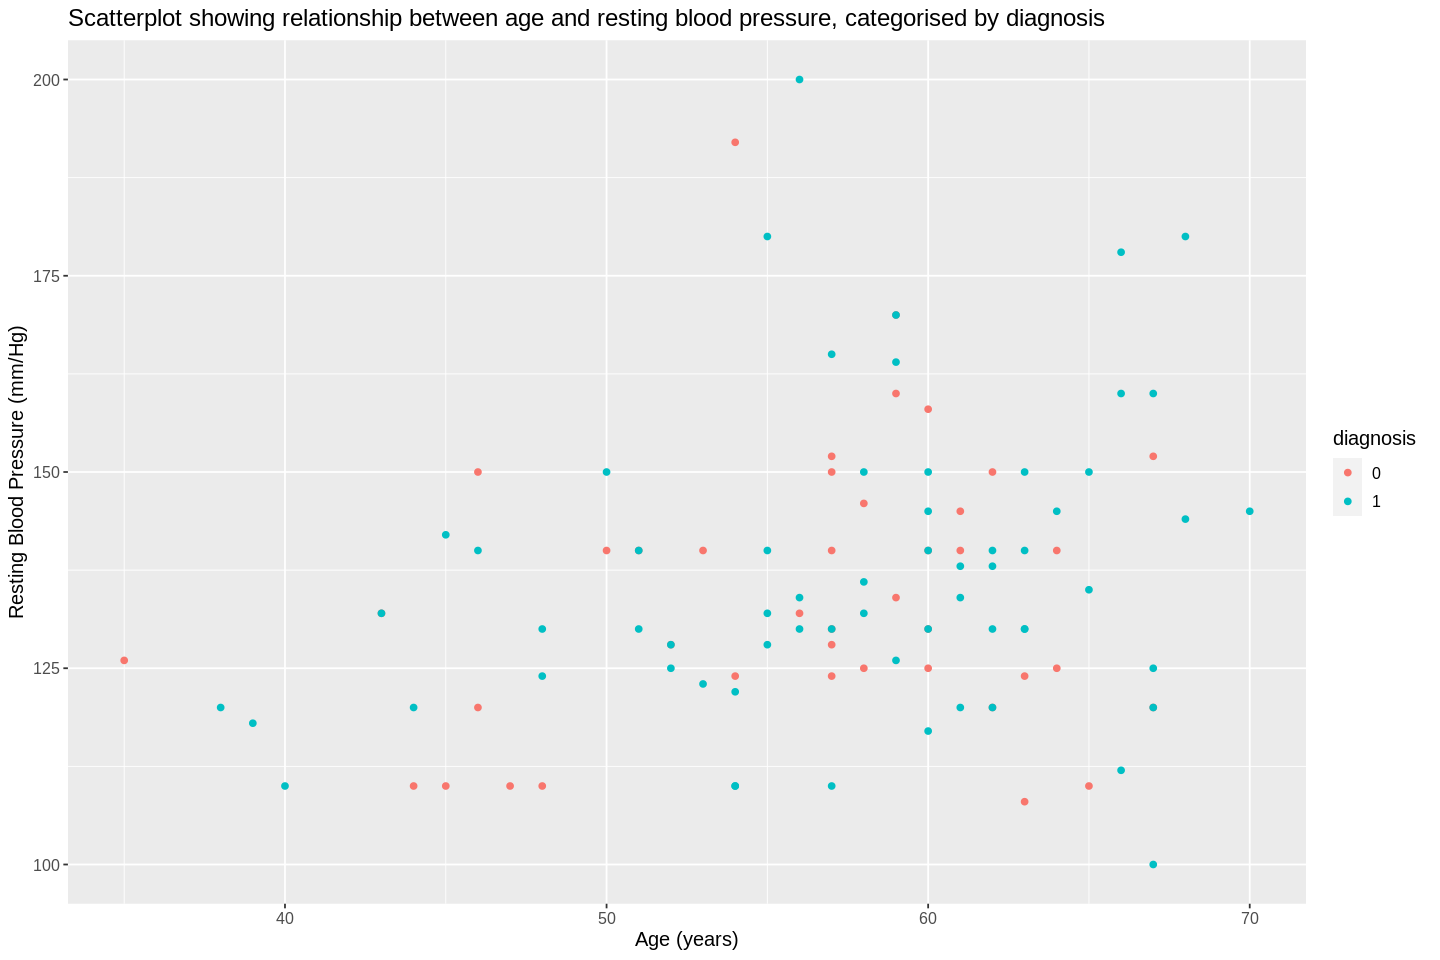

In [82]:
#Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do

#scattor plot showing elationship between age and resting blood pressure, categorised by target.
options(repr.plot.width = 12, repr.plot.height = 8) 
age_resting_point <- heart_train |>
    ggplot(aes(x = age, y = resting_blood_pressure))+
    geom_point(aes(colour = diagnosis))+
    labs(x = "Age (years)", y = "Resting Blood Pressure (mm/Hg)")+
    ggtitle("Scatterplot showing relationship between age and resting blood pressure, categorised by diagnosis")+
    theme(text = element_text(size = 12))
age_resting_point

#0 = negative diagnosis. 1 = positive diagnosis.

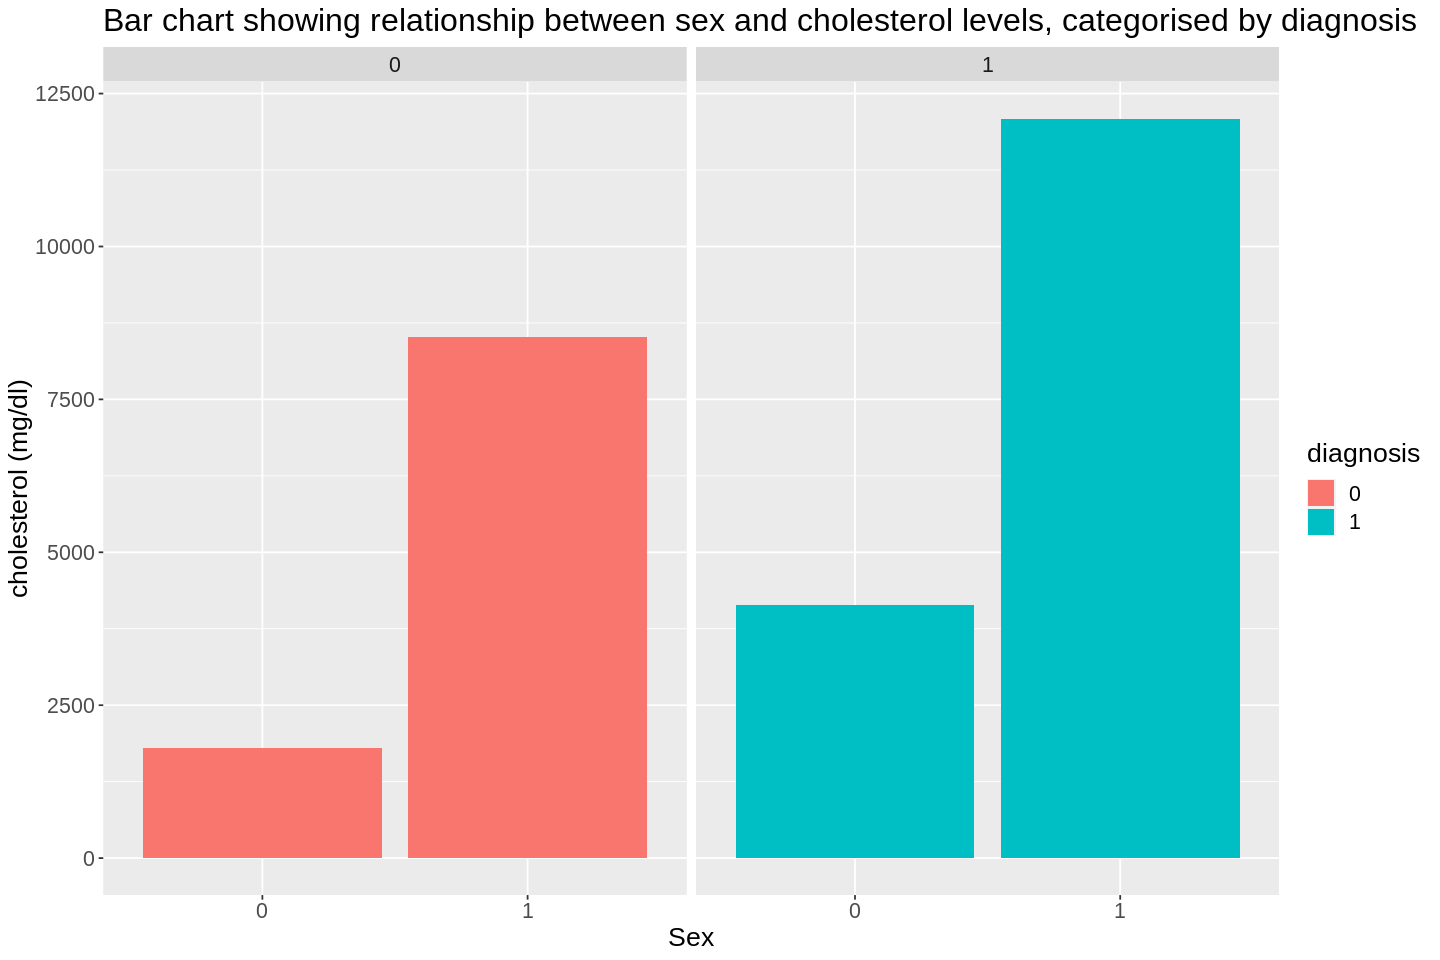

In [83]:
#bar chart showing the relations between sex and cholestrol, categorised by target
options(repr.plot.width = 12, repr.plot.height = 8) 
sex_chol_bar <- heart_train |>
    ggplot(aes(x = sex, y = cholesterol, fill = diagnosis))+
    geom_bar(stat = "identity")+
    facet_grid(cols = vars(diagnosis))+
    labs(x = "Sex", y = "cholesterol (mg/dl)")+
    ggtitle("Bar chart showing relationship between sex and cholesterol levels, categorised by diagnosis")+
    theme(text = element_text(size = 16))
sex_chol_bar

#0 = negative diagnosis. 1 = positive diagnosis.

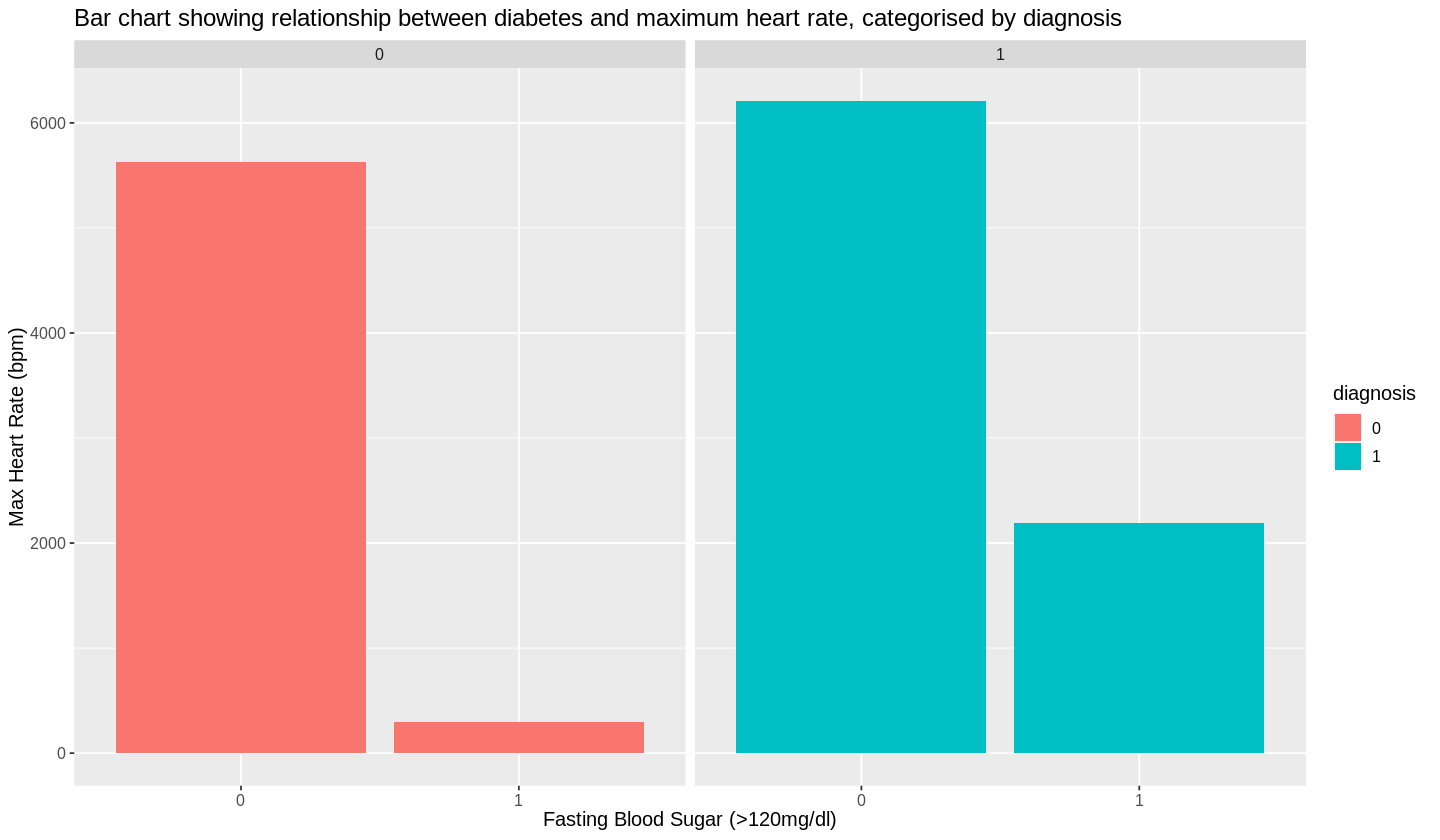

In [84]:
options(repr.plot.width = 12, repr.plot.height = 7) 
sugar_heart_bar <- heart_train |>
    ggplot(aes(x = fasting_blood_sugar, y = max_heart_rate, fill = diagnosis))+
    geom_bar(stat = "identity")+
    facet_grid(cols = vars(diagnosis))+
    labs(x = "Fasting Blood Sugar (>120mg/dl)", y = "Max Heart Rate (bpm)")+
    ggtitle("Bar chart showing relationship between diabetes and maximum heart rate, categorised by diagnosis")+
    theme(text = element_text(size = 12))
sugar_heart_bar

#0 = negative diagnosis. 1 = positive diagnosis.
#False = absence diabetes. True = presence of diabetes

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



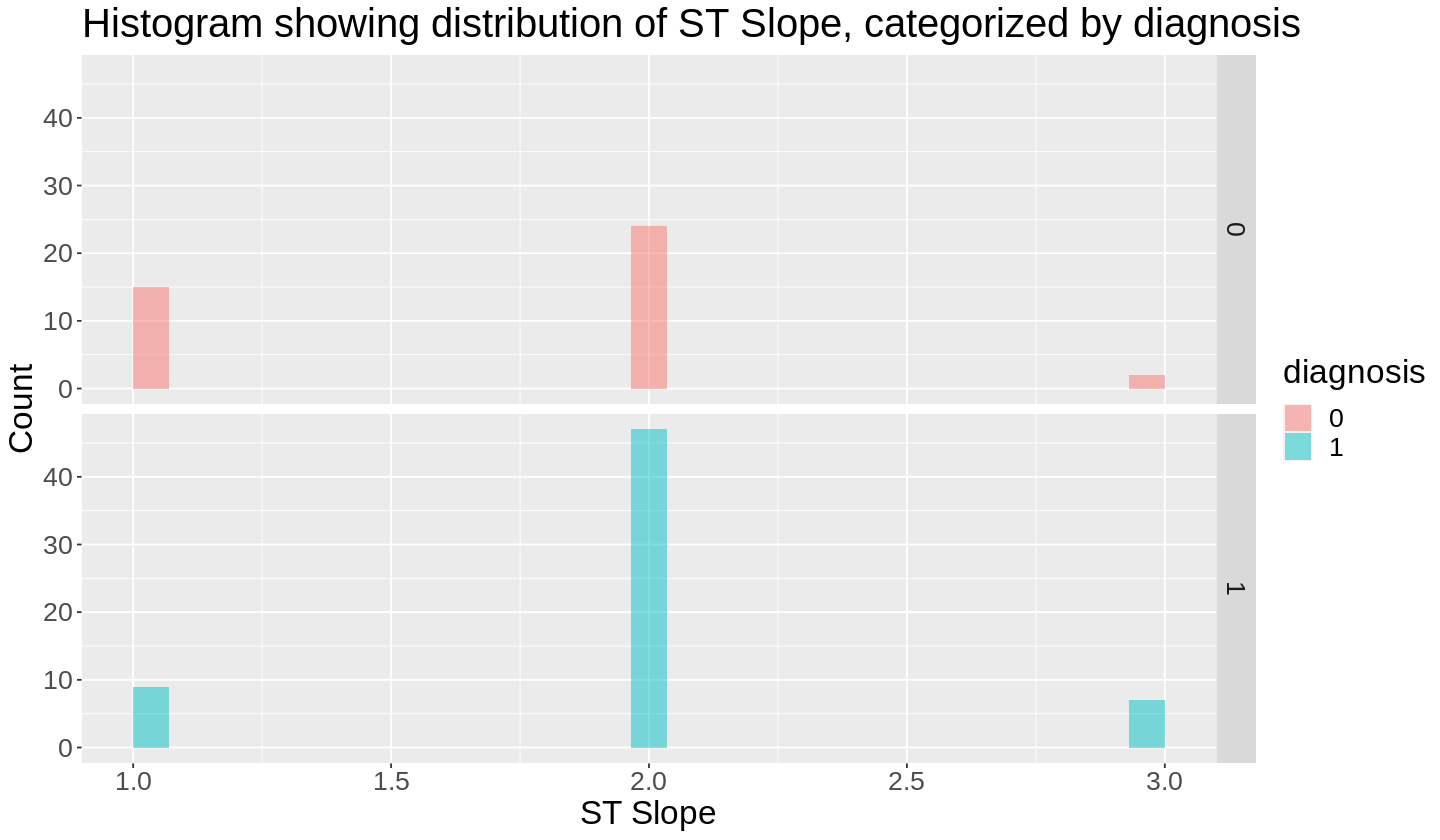

In [86]:
options(repr.plot.width = 12, repr.plot.height = 7)

depression_hist <- heart_train %>%
  ggplot(aes(x = ST_slope, fill = diagnosis)) +
  geom_histogram(alpha = 0.5, position = "identity") +
  facet_grid(rows = vars(diagnosis)) +
  labs(x = "ST Slope", y = "Count") +
  ggtitle("Histogram showing distribution of ST Slope, categorized by diagnosis") +
  theme(text = element_text(size = 20))

depression_hist


In [89]:
#number of men and women
count_sex <- heart_train|>
    count(sex)
count_sex

sex,n
<fct>,<int>
0,21
1,83


In [90]:
#number of people diagnosed with  
count_diag <- heart_train|>
    count(diagnosis)
count_diag

diagnosis,n
<fct>,<int>
0,41
1,63


In [91]:
count_sugar <- heart_train|>
    count(fasting_blood_sugar)
count_sugar

fasting_blood_sugar,n
<fct>,<int>
0,86
1,18


In [92]:
count_rest_ecg <- heart_train|>
    count(rest_ecg)
count_rest_ecg

rest_ecg,n
<fct>,<int>
0,44
1,2
2,58


In [93]:
count_exer <- heart_train|>
    count(exercise_induced_angina)
count_exer

exercise_induced_angina,n
<fct>,<int>
0,44
1,60


In [94]:
count_slope <- heart_train|>
    count(ST_slope)
count_slope

ST_slope,n
<dbl>,<int>
1,24
2,71
3,9


In [95]:
count_thal <- heart_train|>
    count(thalassemia)
count_thal

thalassemia,n
<fct>,<int>
NA,104


List of 1
 $ text:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 20
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



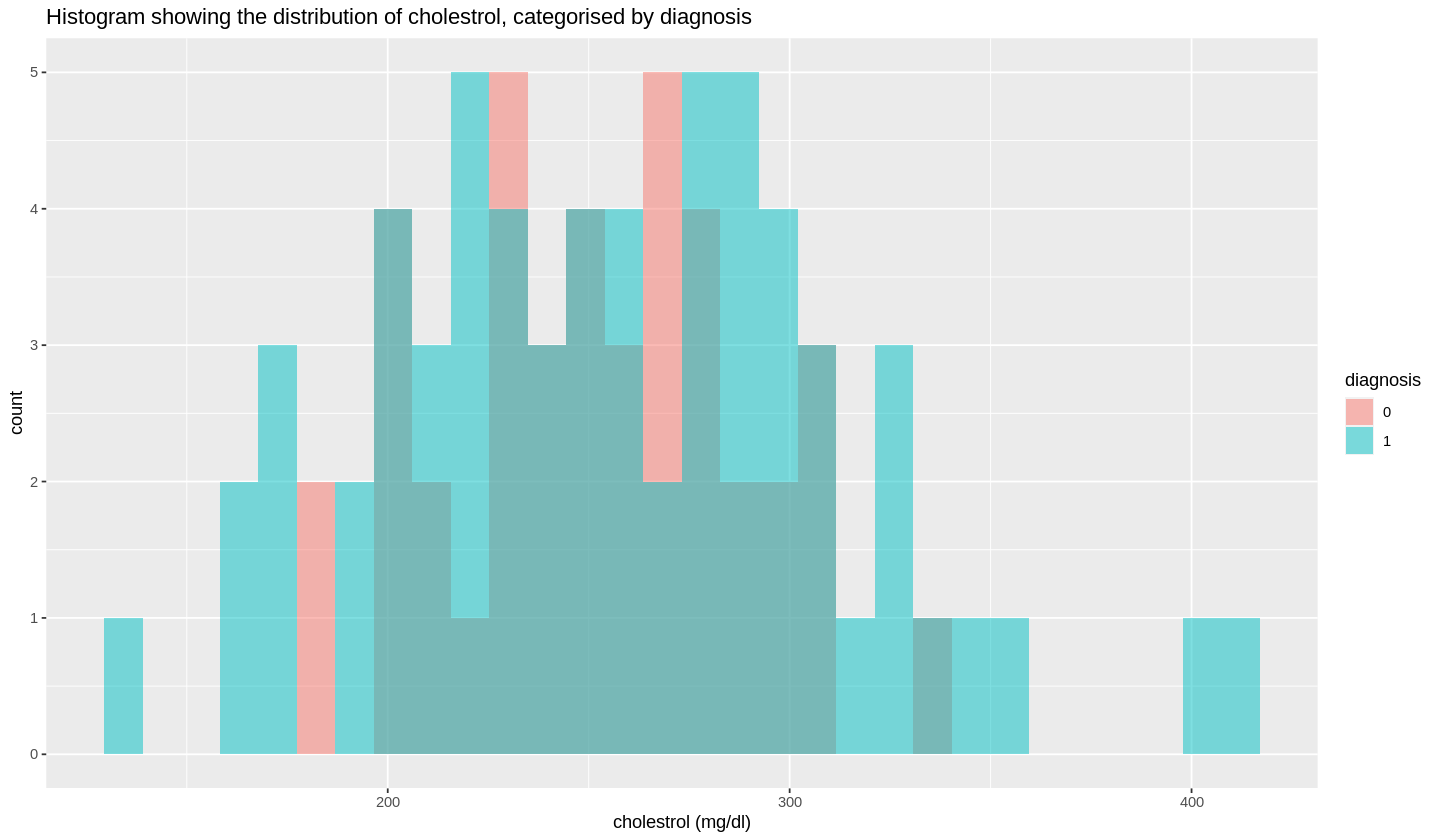

In [96]:
options(repr.plot.width = 12, repr.plot.height = 7) 
slope_hist <- heart_train |>
    ggplot(aes(x = cholesterol, fill = diagnosis))+
    geom_histogram(alpha = 0.5, position = "identity")+
    labs(x = "cholestrol (mg/dl)")+
    ggtitle("Histogram showing the distribution of cholestrol, categorised by diagnosis")
    theme(text = element_text(size = 20))
slope_hist

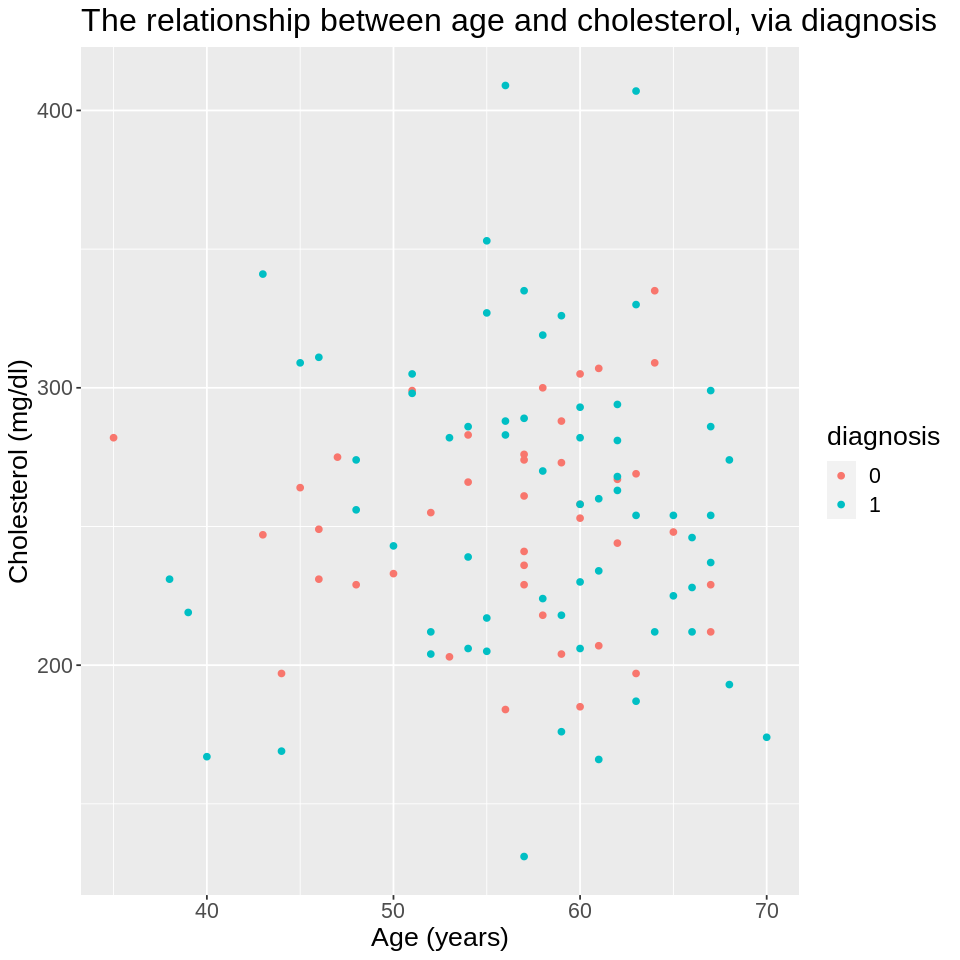

In [97]:
#scattor plot showing relationship between age and cholesterol, categorised by target.
options(repr.plot.width = 8, repr.plot.height = 8) 
age_chol_point <- heart_train |>
    ggplot(aes(x = age, y = cholesterol))+
    geom_point(aes(colour = diagnosis))+
    labs(x = "Age (years)", y = "Cholesterol (mg/dl)")+
    ggtitle("The relationship between age and cholesterol, via diagnosis")+
    theme(text = element_text(size = 16))
age_chol_point

#0 = negative diagnosis. 1 = positive diagnosis.

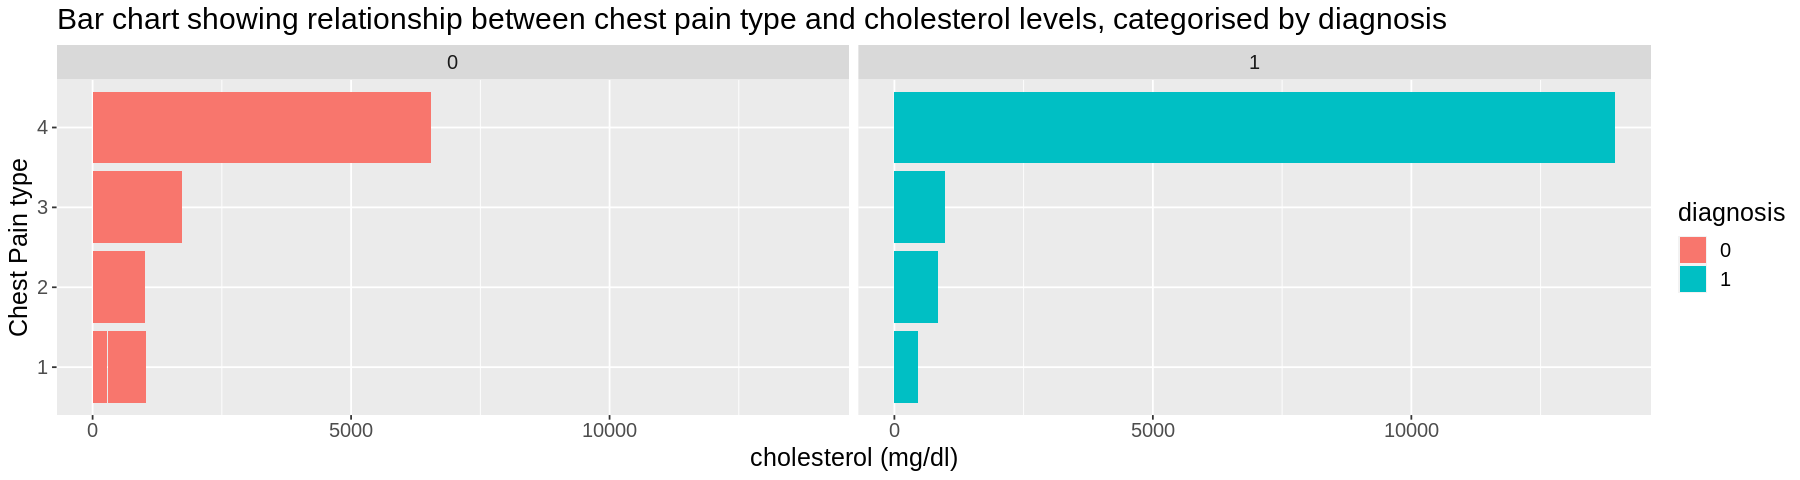

In [98]:
#bar chart showing relationship between chest pain type and cholesterol, categorised by diagnosis
options(repr.plot.width = 15, repr.plot.height = 4) 
chest_chol_bar <- heart_train |>
    ggplot(aes(x = chest_pain, y = cholesterol, fill = diagnosis))+
    geom_bar(stat = "identity")+
    facet_grid(cols = vars(diagnosis))+
    labs(x = "Chest Pain type", y = "cholesterol (mg/dl)")+
    ggtitle("Bar chart showing relationship between chest pain type and cholesterol levels, categorised by diagnosis")+
    theme(text = element_text(size = 15))

chest_chol_bar <- chest_chol_bar+coord_flip()
chest_chol_bar

#0 = negative diagnosis. 1 = positive diagnosis.

**2. Find best K neighbors value and plot accuracy vs. k-value** 

In [101]:
heart_select_scale <- heart_train |>
    select(chest_pain, fasting_blood_sugar, max_heart_rate, ST_slope, age, rest_ecg, diagnosis)
#    mutate(chest_pain = as.numeric(chest_pain), fasting_blood_sugar = as.numeric(fasting_blood_sugar), max_heart_rate = as.numeric(max_heart_rate), 
#           ST_slope = as.numeric(ST_slope), rest_ecg = as.numeric(rest_ecg))|>
 #   mutate(diagnosis = as_factor(diagnosis))|>
  #    mutate(scaled_age = scale(age, center = TRUE),
   #      scaled_ST_slope = scale(ST_slope, center = TRUE),
    #     scaled_rest_ecg = scale(rest_ecg, center = TRUE), 
     #    scaled_max_hr = scale(max_heart_rate, center = TRUE), 
      #   scaled_fasting_blood_sugar = scale(fasting_blood_sugar, center = TRUE),
        # scaled_chest_pain = scale(chest_pain, center = TRUE)) |> 
    #select(scaled_ST_slope, scaled_age, scaled_rest_ecg, scaled_max_hr, scaled_fasting_blood_sugar, scaled_chest_pain, diagnosis)
heart_select_scale

,chest_pain,fasting_blood_sugar,max_heart_rate,ST_slope,age,rest_ecg,diagnosis
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
3,4,0,129,2,67,2,0
10,4,1,155,3,53,2,0
17,2,0,168,3,48,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
297,4,1,90,2,59,2,1
300,4,1,141,2,68,0,1
301,4,0,115,2,57,0,1


In [103]:
set.seed(20)
options(repr.plot.width = 8, repr.plot.height = 8) 
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

recipe <- recipe(diagnosis ~., data = heart_select_scale) |>
                        step_scale(all_numeric()) |>
                        step_center(all_numeric())

fit <- workflow() |>
                    add_recipe(recipe) |>
                    add_model(knn_spec) |>
                    fit(data = heart_select_scale)

train_vfold <- vfold_cv(heart_select_scale, v = 5, strata = diagnosis)

k_lots <- tibble(neighbors = seq(from = 2, to = 10, by = 1))

knn_results <- workflow() |>
  add_recipe(recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = train_vfold, grid = k_lots) |>
  collect_metrics()

accuracies <- knn_results |>
  filter(.metric == "accuracy")

cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  theme(text = element_text(size = 12))
cross_val_plot

Warning message:
“tune samples were requested but there were 104 rows in the data. 99 will be used.”


ERROR: Error in get(ctr, mode = "function", envir = parent.frame()): object 'contr.dummy' of mode 'function' was not found


Number of k neighbours selected: ???

**Discussion**

summarize what you found
discuss whether this is what you expected to find?
discuss what impact could such findings have?
discuss what future questions could this lead to?

*Predictor choices.* 

We didn't use forward selection as mentioned in our proposal, a TA advised us not to as it was beyond the scope of this course. Thus, we set out to find another way to choose our best predictors without having to test the accuracy of 479001600 predictor combonations by hand. A quick google search led us to understand we can use what we learned in regression to view the correlations between varibles and use that to pick our predictors for classification (Carvalho et. al, 2019). Using the leaps package, an article by Atinakarim on medium walked us through how to do this (2021).  


**References** 

Atinakarim. (2021, May 25). Selecting the best predictors for linear regression in R. Medium. https://towardsdatascience.com/selecting-the-best-predictors-for-linear-regression-in-r-f385bf3d93e9 

Carvalho, P., López, D., &amp; Alex2006. (2019, April). How to determine which are the best predictor variables given a known classification?. Cross Validated. https://stats.stackexchange.com/questions/399711/how-to-determine-which-are-the-best-predictor-variables-given-a-known-classifica 

Lumley, T. (Version 3.1). leaps: Regression Subset Selection [Computer software]. Retrieved from CRAN. URL: https://rdrr.io/cran/leaps/

Janosi,Andras, Steinbrunn,William, Pfisterer,Matthias, and Detrano,Robert. (1988). Heart Disease. UCI Machine Learning Repository. 
https://doi.org/10.24432/C52P4X.


.